In [2]:
%cd /content/drive/MyDrive/DroneYoloBuildsV8

/content/drive/MyDrive/DroneYoloBuildsV8


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YOU-APIKEY-ROBOFLOW-PRIVATE")
project = rf.workspace("arturwork").project("builddetect")
version = project.version(5)
dataset = version.download("yolov8")



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 829.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.


Extracting Dataset Version Zip to BuildDetect-5 in yolov8:: 100%|██████████| 391/391 [00:04<00:00, 89.87it/s]


In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.7/793.7 kB 10.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-


Edit data.yaml in train and val in you root
```
names:
- build
- build2
nc: 2
roboflow:
  license: CC BY 4.0
  project: builddetect
  url: https://universe.roboflow.com/arturwork/builddetect/dataset/5
  version: 5
  workspace: arturwork
test: ../test/images
train: /YOUR-ROOT-TO/BuildDetect-5/train/images
val: /YOUR-ROOT-TO/BuildDetect-5/valid/images
```



In [4]:
from ultralytics import YOLO

# Definir la ruta al archivo data.yaml
data_yaml = 'BuildDetect-5/data.yaml'

# Inicializar el modelo YOLOv8
model = YOLO('yolov8n.yaml')  # Crear un nuevo modelo desde el archivo YAML
# Alternativamente, puedes usar un modelo pre-entrenado:
# model = YOLO('yolov8n.pt')

# Entrenar el modelo
results = model.train(
    data=data_yaml,
    epochs=100,  # Número de épocas
    imgsz=640,   # Tamaño de la imagen de entrada
    batch=16,    # Tamaño del batch
    name='yolov8n_custom'  # Nombre para guardar los resultados
)

# Evaluar el modelo en el conjunto de validación
results = model.val()



Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=BuildDetect-5/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_custom, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

100%|██████████| 755k/755k [00:00<00:00, 4.43MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 23.0MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/train/labels.cache... 183 images, 0 backgrounds, 0 corrupt: 100%|██████████| 183/183 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8/8 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8n_custom/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8n_custom
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.56G      3.819      5.093       4.31         28        640: 100%|██████████| 12/12 [00:07<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.62s/it]

                   all          8         14   0.000834      0.143   0.000811   0.000376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.26G      3.425      4.621      4.153         20        640: 100%|██████████| 12/12 [00:04<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all          8         14    0.00122      0.143    0.00113   0.000512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.28G      3.391      4.574      4.073         26        640: 100%|██████████| 12/12 [00:04<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all          8         14    0.00124      0.143    0.00789    0.00661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.28G      3.213      4.312      3.793         35        640: 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.23it/s]

                   all          8         14    0.00122      0.143     0.0388    0.00901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.29G      3.268      4.306      3.626         15        640: 100%|██████████| 12/12 [00:03<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

                   all          8         14    0.00121      0.143    0.00915     0.0013



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.28G      3.244      4.163      3.484         24        640: 100%|██████████| 12/12 [00:05<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all          8         14   0.000948      0.143     0.0422     0.0268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.26G      3.124      4.061       3.32         21        640: 100%|██████████| 12/12 [00:03<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]

                   all          8         14      0.502     0.0714     0.0487     0.0196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.28G      3.227      4.034      3.213         22        640: 100%|██████████| 12/12 [00:03<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.92it/s]

                   all          8         14      0.505     0.0714     0.0972     0.0168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.28G      3.099      3.959       3.06         31        640: 100%|██████████| 12/12 [00:03<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all          8         14     0.0104      0.143     0.0852     0.0112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.27G      3.148      4.031      3.041         14        640: 100%|██████████| 12/12 [00:05<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]

                   all          8         14    0.00318      0.143     0.0278     0.0181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.28G      3.021      3.841       2.87         29        640: 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]

                   all          8         14       0.55     0.0714      0.014    0.00573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.28G      2.893      3.719      2.834         29        640: 100%|██████████| 12/12 [00:03<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

                   all          8         14     0.0208     0.0714     0.0178    0.00528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.28G      2.986      3.729       2.82         25        640: 100%|██████████| 12/12 [00:04<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

                   all          8         14    0.00207      0.357    0.00183   0.000773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.28G      2.843       3.65      2.779         29        640: 100%|██████████| 12/12 [00:04<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.64it/s]

                   all          8         14      0.505     0.0714     0.0271    0.00404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.28G      2.849      3.608      2.689         25        640: 100%|██████████| 12/12 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.93it/s]

                   all          8         14       0.51      0.143     0.0148    0.00458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.28G      2.909       3.48      2.721         24        640: 100%|██████████| 12/12 [00:03<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]

                   all          8         14      0.508     0.0714     0.0816     0.0211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.28G      2.749        3.4      2.549         31        640: 100%|██████████| 12/12 [00:05<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all          8         14    0.00635      0.357     0.0877     0.0274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.28G      2.792       3.28      2.534         28        640: 100%|██████████| 12/12 [00:03<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all          8         14     0.0257      0.143      0.088     0.0267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.28G      2.658      3.158      2.557         26        640: 100%|██████████| 12/12 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.96it/s]

                   all          8         14       0.24      0.143      0.104      0.084



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.28G      2.654      3.197      2.533         20        640: 100%|██████████| 12/12 [00:03<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.70it/s]

                   all          8         14     0.0105      0.143     0.0129    0.00443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.28G      2.725      3.278      2.636         30        640: 100%|██████████| 12/12 [00:05<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all          8         14    0.00374      0.143     0.0145    0.00503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.28G      2.657       3.23       2.49         34        640: 100%|██████████| 12/12 [00:03<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

                   all          8         14    0.00932      0.214     0.0336     0.0143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.26G      2.639      3.095      2.496         27        640: 100%|██████████| 12/12 [00:03<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]

                   all          8         14      0.024     0.0714      0.118     0.0433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.28G      2.539      3.112      2.503         29        640: 100%|██████████| 12/12 [00:03<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.97it/s]

                   all          8         14      0.606     0.0714      0.135     0.0762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.28G      2.596      2.969       2.35         28        640: 100%|██████████| 12/12 [00:04<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]

                   all          8         14      0.261      0.226      0.128     0.0338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.28G      2.561      2.966      2.381         28        640: 100%|██████████| 12/12 [00:03<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]

                   all          8         14     0.0392      0.214      0.031    0.00968



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.28G      2.639      2.914      2.291         23        640: 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all          8         14      0.201      0.267       0.13     0.0462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.28G      2.588      2.804      2.274         29        640: 100%|██████████| 12/12 [00:04<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all          8         14      0.198      0.143       0.17      0.079



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.28G      2.573      2.836      2.342         18        640: 100%|██████████| 12/12 [00:04<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.99it/s]

                   all          8         14      0.173      0.214      0.115     0.0551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.28G       2.51      2.856      2.319         23        640: 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all          8         14      0.164      0.357      0.149     0.0672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.29G      2.407      2.812      2.312         16        640: 100%|██████████| 12/12 [00:03<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.65it/s]

                   all          8         14      0.207      0.321      0.219     0.0712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.28G      2.482      2.691      2.246         27        640: 100%|██████████| 12/12 [00:05<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]

                   all          8         14      0.133      0.143     0.0971     0.0679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.28G      2.476      2.672      2.232         26        640: 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all          8         14      0.438      0.214       0.19      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.29G      2.472      2.731      2.259         15        640: 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]

                   all          8         14      0.387      0.207      0.108     0.0527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.28G      2.398      2.697      2.237         36        640: 100%|██████████| 12/12 [00:04<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]

                   all          8         14      0.425      0.214      0.216      0.153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.28G      2.375      2.635       2.18         31        640: 100%|██████████| 12/12 [00:05<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all          8         14      0.237      0.214      0.189      0.124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.28G      2.346      2.571      2.152         24        640: 100%|██████████| 12/12 [00:03<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all          8         14      0.166      0.214      0.159      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.28G      2.395       2.48       2.11         27        640: 100%|██████████| 12/12 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all          8         14      0.182       0.33      0.178     0.0909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.28G      2.314       2.46      2.112         17        640: 100%|██████████| 12/12 [00:05<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]

                   all          8         14      0.205      0.286      0.229      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.28G      2.244      2.363      2.003         27        640: 100%|██████████| 12/12 [00:03<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all          8         14      0.892      0.143      0.245      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.29G       2.26      2.456      2.077         17        640: 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]

                   all          8         14        0.5      0.139      0.164     0.0606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.26G      2.318       2.42      2.075         31        640: 100%|██████████| 12/12 [00:03<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all          8         14      0.647      0.286      0.335      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.28G      2.213      2.286      1.998         25        640: 100%|██████████| 12/12 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]

                   all          8         14       0.44      0.429      0.416      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.28G      2.255      2.321      2.039         28        640: 100%|██████████| 12/12 [00:03<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all          8         14      0.461      0.286      0.315      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.28G      2.213      2.239      1.985         31        640: 100%|██████████| 12/12 [00:03<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]

                   all          8         14      0.474      0.286      0.306      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.28G      2.258      2.243      1.958         38        640: 100%|██████████| 12/12 [00:05<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]

                   all          8         14        0.5      0.133      0.203      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.28G      2.154      2.218       1.96         28        640: 100%|██████████| 12/12 [00:04<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all          8         14      0.286      0.286      0.217     0.0809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.28G       2.21      2.199      1.901         28        640: 100%|██████████| 12/12 [00:03<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.40it/s]

                   all          8         14      0.416      0.286      0.344      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.29G      2.191      2.211      1.961         21        640: 100%|██████████| 12/12 [00:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all          8         14      0.603      0.286      0.294      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.28G      2.215      2.185      1.958         21        640: 100%|██████████| 12/12 [00:04<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

                   all          8         14      0.576      0.286      0.281      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.28G      2.113      2.036      1.872         28        640: 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.46it/s]


                   all          8         14      0.437      0.357      0.358      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.28G      2.156      2.106      1.932         25        640: 100%|██████████| 12/12 [00:03<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.76it/s]

                   all          8         14      0.456      0.357      0.313      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.28G      2.115      2.016       1.87         21        640: 100%|██████████| 12/12 [00:04<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all          8         14      0.457      0.357      0.352      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.28G      2.075      2.045      1.863         29        640: 100%|██████████| 12/12 [00:05<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all          8         14      0.518      0.429      0.432      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.28G      2.085       2.01      1.839         35        640: 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]

                   all          8         14      0.574      0.286      0.383       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.28G      2.103      2.021      1.847         24        640: 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.30it/s]

                   all          8         14      0.379      0.268      0.269      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.26G      1.994      1.897      1.768         20        640: 100%|██████████| 12/12 [00:05<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]

                   all          8         14      0.547      0.267      0.339      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.28G      1.977      1.912      1.778         31        640: 100%|██████████| 12/12 [00:04<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all          8         14       0.59      0.286      0.357      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.28G      2.024       1.99      1.866         22        640: 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all          8         14      0.619      0.418      0.384      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.27G      1.966      1.887      1.805         16        640: 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all          8         14      0.406        0.5      0.422       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.28G      2.015      1.905      1.832         27        640: 100%|██████████| 12/12 [00:05<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]

                   all          8         14      0.663      0.286      0.338      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.29G      1.936      1.933      1.778         16        640: 100%|██████████| 12/12 [00:04<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all          8         14      0.701      0.286      0.321      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.28G      1.997      1.902      1.809         20        640: 100%|██████████| 12/12 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.53it/s]


                   all          8         14       0.34      0.348      0.351      0.191

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.28G      1.946       1.87       1.76         25        640: 100%|██████████| 12/12 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]

                   all          8         14      0.681      0.357       0.39      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.28G      2.021      1.921      1.792         31        640: 100%|██████████| 12/12 [00:05<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]

                   all          8         14        0.6      0.357      0.382      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.28G      1.872      1.791      1.816         25        640: 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.07it/s]

                   all          8         14      0.479      0.429      0.352      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.26G      1.922       1.83      1.702         23        640: 100%|██████████| 12/12 [00:03<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all          8         14      0.552      0.335      0.384      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.28G      1.927      1.818      1.704         28        640: 100%|██████████| 12/12 [00:04<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all          8         14      0.677      0.286      0.385      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.26G       1.86      1.802      1.789         26        640: 100%|██████████| 12/12 [00:05<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

                   all          8         14      0.435      0.429      0.447      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.28G      1.801      1.699      1.721         29        640: 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.01it/s]


                   all          8         14      0.726      0.357      0.401      0.209

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.26G      1.843      1.756      1.686         28        640: 100%|██████████| 12/12 [00:03<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.08it/s]


                   all          8         14      0.616      0.357      0.418      0.216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.28G      1.786      1.653      1.646         32        640: 100%|██████████| 12/12 [00:04<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all          8         14       0.34      0.286      0.331      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.28G      1.855      1.751      1.691         25        640: 100%|██████████| 12/12 [00:03<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]


                   all          8         14      0.535      0.357       0.44      0.209

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.28G      1.848      1.685      1.693         26        640: 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]

                   all          8         14      0.571      0.357      0.374      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.28G      1.827      1.677      1.694         31        640: 100%|██████████| 12/12 [00:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.89it/s]

                   all          8         14      0.602      0.429      0.404      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.28G      1.806      1.644      1.731         27        640: 100%|██████████| 12/12 [00:05<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all          8         14      0.557      0.415      0.408      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.28G      1.758      1.611      1.645         17        640: 100%|██████████| 12/12 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.16it/s]


                   all          8         14       0.53      0.357      0.447      0.189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.26G      1.772      1.638      1.677         21        640: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]

                   all          8         14      0.655      0.357      0.465      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.29G      1.802      1.637      1.659         17        640: 100%|██████████| 12/12 [00:04<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all          8         14      0.472      0.429      0.423      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.28G      1.836      1.631      1.647         36        640: 100%|██████████| 12/12 [00:05<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]

                   all          8         14      0.594      0.423      0.446      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.28G       1.77      1.637      1.681         24        640: 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.59it/s]

                   all          8         14      0.601      0.429      0.489      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.29G      1.697       1.53      1.668         18        640: 100%|██████████| 12/12 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]

                   all          8         14      0.512      0.485      0.464      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.28G      1.748      1.656      1.669         35        640: 100%|██████████| 12/12 [00:04<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]

                   all          8         14      0.527      0.357      0.336      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.28G       1.78      1.606      1.627         24        640: 100%|██████████| 12/12 [00:04<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]

                   all          8         14      0.587      0.357      0.413      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.28G      1.654      1.577      1.578         18        640: 100%|██████████| 12/12 [00:03<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]

                   all          8         14       0.56      0.357       0.46      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.28G       1.72      1.589      1.611         24        640: 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.31it/s]

                   all          8         14      0.718      0.357      0.492      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.28G      1.703      1.519      1.574         33        640: 100%|██████████| 12/12 [00:04<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all          8         14      0.658      0.357      0.454      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.28G      1.808      1.622      1.662         37        640: 100%|██████████| 12/12 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.76it/s]

                   all          8         14      0.746      0.352      0.483      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.28G      1.718      1.527      1.611         27        640: 100%|██████████| 12/12 [00:03<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all          8         14      0.852      0.351      0.513      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.26G      1.669      1.512      1.623         29        640: 100%|██████████| 12/12 [00:03<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.92it/s]

                   all          8         14      0.653      0.357      0.464      0.213


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       2.4G      1.725      1.643      1.603         14        640: 100%|██████████| 12/12 [00:07<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]

                   all          8         14      0.488      0.544      0.476      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.27G      1.552      1.551      1.521         12        640: 100%|██████████| 12/12 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.37it/s]

                   all          8         14      0.467      0.643      0.517       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.27G      1.688      1.546      1.596         14        640: 100%|██████████| 12/12 [00:04<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]

                   all          8         14      0.547      0.625      0.594      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.27G       1.59      1.437      1.566         12        640: 100%|██████████| 12/12 [00:05<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]

                   all          8         14      0.419      0.643      0.549      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.27G      1.582      1.452      1.552         12        640: 100%|██████████| 12/12 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.77it/s]

                   all          8         14      0.674      0.424      0.532      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.27G      1.613      1.487      1.516         12        640: 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.91it/s]

                   all          8         14      0.495      0.524      0.523      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.27G      1.548      1.377      1.534         13        640: 100%|██████████| 12/12 [00:04<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]

                   all          8         14      0.456      0.583      0.513      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.27G      1.756      1.442      1.568         14        640: 100%|██████████| 12/12 [00:04<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all          8         14      0.505      0.545      0.554      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.27G       1.62       1.48       1.51         14        640: 100%|██████████| 12/12 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all          8         14      0.536      0.534      0.563      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.27G      1.535      1.416      1.515         12        640: 100%|██████████| 12/12 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.79it/s]

                   all          8         14       0.51        0.5      0.575      0.295



100 epochs completed in 0.159 hours.
Optimizer stripped from runs/detect/yolov8n_custom/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8n_custom/weights/best.pt, 6.2MB

Validating runs/detect/yolov8n_custom/weights/best.pt...
Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.56it/s]


                   all          8         14      0.508        0.5      0.575      0.295
                 build          7          7      0.459      0.571      0.687      0.342
                build2          7          7      0.558      0.429      0.463      0.248
Speed: 0.3ms preprocess, 3.1ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/yolov8n_custom
Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8/8 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]


                   all          8         14       0.51        0.5      0.575      0.293
                 build          7          7       0.46      0.571      0.687      0.338
                build2          7          7       0.56      0.429      0.463      0.248
Speed: 0.3ms preprocess, 24.3ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/yolov8n_custom2


In [5]:
# Realizar predicciones en nuevas imágenes
results = model('/content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images/9_png.rf.29fd11c24b38c6ccb4a40de001de75b1.jpg')


image 1/1 /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images/9_png.rf.29fd11c24b38c6ccb4a40de001de75b1.jpg: 384x640 2 builds, 196.8ms
Speed: 1.9ms preprocess, 196.8ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)



image 1/1 /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images/013_png.rf.56567021e19a21947dbaf287f1685244.jpg: 384x640 (no detections), 8.4ms
Speed: 1.2ms preprocess, 8.4ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


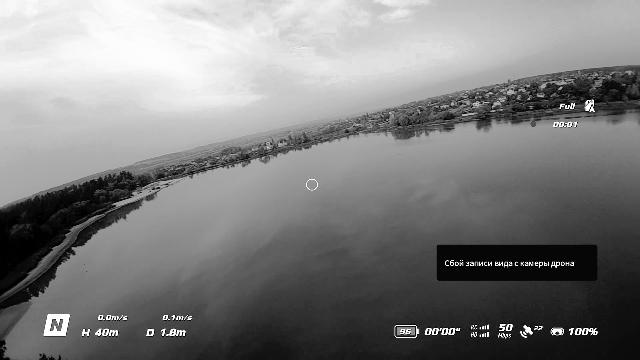

Detecciones para 013_png.rf.56567021e19a21947dbaf287f1685244.jpg:
Número de objetos detectados: 0



image 1/1 /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images/014_png.rf.faee8c1471e6435fd9afcb663244ff9e.jpg: 384x640 (no detections), 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


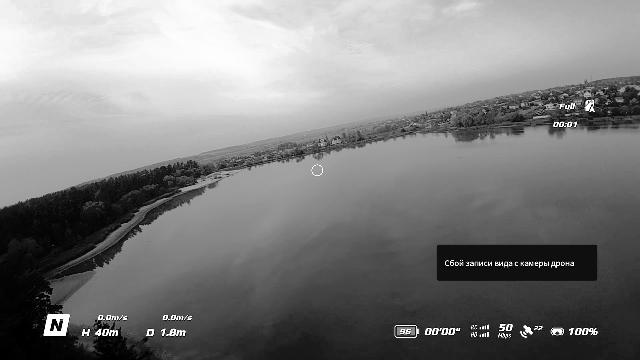

Detecciones para 014_png.rf.faee8c1471e6435fd9afcb663244ff9e.jpg:
Número de objetos detectados: 0



image 1/1 /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images/021_png.rf.28f01b04601e9465b1d2a6c032294258.jpg: 384x640 (no detections), 10.6ms
Speed: 1.5ms preprocess, 10.6ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)


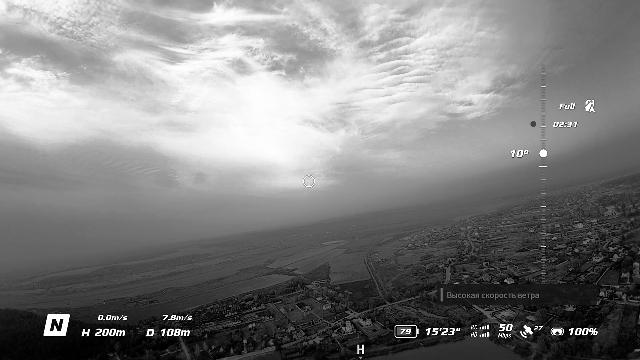

Detecciones para 021_png.rf.28f01b04601e9465b1d2a6c032294258.jpg:
Número de objetos detectados: 0



image 1/1 /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images/23_png.rf.f699489deb92e36be2a45b0651a8bc81.jpg: 384x640 2 builds, 12.3ms
Speed: 1.5ms preprocess, 12.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)


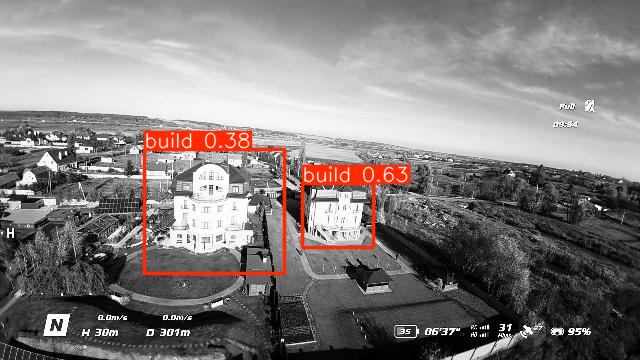

Detecciones para 23_png.rf.f699489deb92e36be2a45b0651a8bc81.jpg:
Número de objetos detectados: 2
  Clase: build, Confianza: 0.63
  Clase: build, Confianza: 0.38



image 1/1 /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images/25_png.rf.11cd70935a39837f7f839ddf70b393c5.jpg: 384x640 2 builds, 1 build2, 18.9ms
Speed: 1.6ms preprocess, 18.9ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


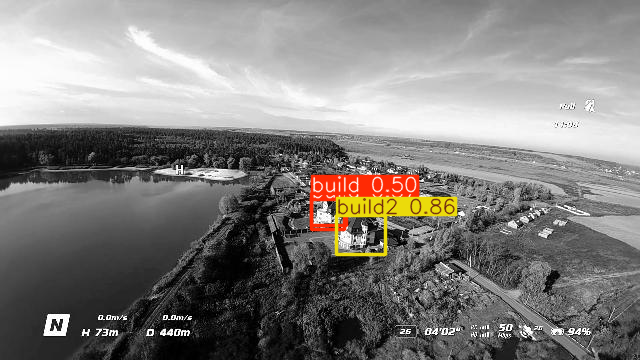

Detecciones para 25_png.rf.11cd70935a39837f7f839ddf70b393c5.jpg:
Número de objetos detectados: 3
  Clase: build2, Confianza: 0.86
  Clase: build, Confianza: 0.50
  Clase: build, Confianza: 0.37



image 1/1 /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images/9_png.rf.29fd11c24b38c6ccb4a40de001de75b1.jpg: 384x640 2 builds, 9.9ms
Speed: 1.6ms preprocess, 9.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


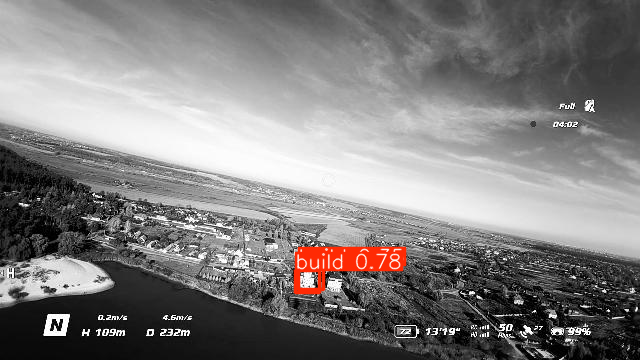

Detecciones para 9_png.rf.29fd11c24b38c6ccb4a40de001de75b1.jpg:
Número de objetos detectados: 2
  Clase: build, Confianza: 0.78
  Clase: build, Confianza: 0.35



image 1/1 /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images/build_1_02_png.rf.671f5f4b78fe5d065bfeb7f0365e95cc.jpg: 544x640 1 build, 129.9ms
Speed: 1.8ms preprocess, 129.9ms inference, 4.4ms postprocess per image at shape (1, 3, 544, 640)


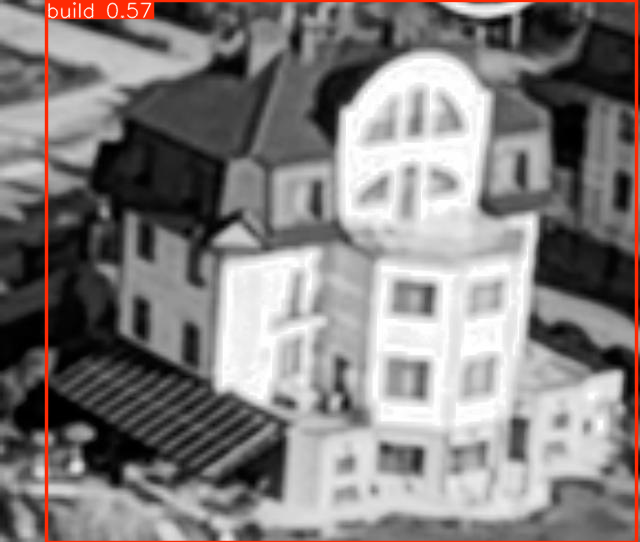

Detecciones para build_1_02_png.rf.671f5f4b78fe5d065bfeb7f0365e95cc.jpg:
Número de objetos detectados: 1
  Clase: build, Confianza: 0.57



image 1/1 /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images/build_2_05_png.rf.8648184583def533c0dcd00d493f8b65.jpg: 544x640 1 build, 1 build2, 10.5ms
Speed: 2.9ms preprocess, 10.5ms inference, 5.2ms postprocess per image at shape (1, 3, 544, 640)


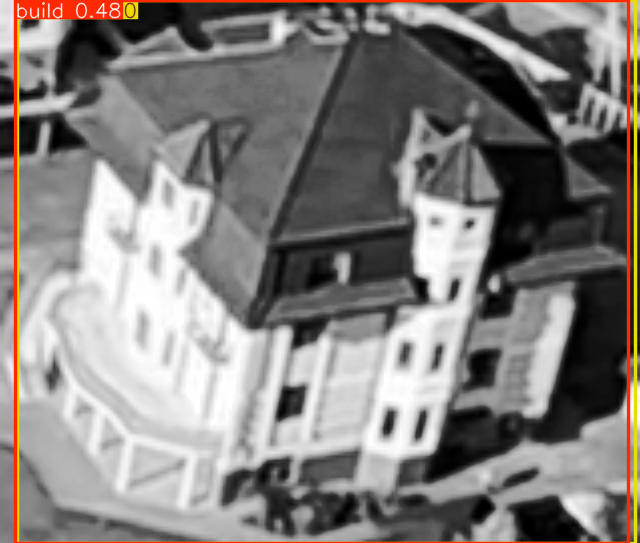

Detecciones para build_2_05_png.rf.8648184583def533c0dcd00d493f8b65.jpg:
Número de objetos detectados: 2
  Clase: build, Confianza: 0.48
  Clase: build2, Confianza: 0.30


Resultados guardados en validation_results


In [8]:
from ultralytics import YOLO
import glob
import cv2
import os
from google.colab.patches import cv2_imshow
from IPython.display import display, Image
import numpy as np

# Cargar el modelo entrenado
model = YOLO('/content/drive/MyDrive/DroneYoloBuildsV8/runs/detect/yolov8n_custom/weights/best.pt')  # Ajusta esta ruta a donde se guardó tu mejor modelo

# Directorio que contiene las imágenes para validar
image_dir = '/content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images'  # Ajusta esta ruta a tu directorio de imágenes

# Obtener todas las imágenes en el directorio
image_files = glob.glob(os.path.join(image_dir, '*.jpg')) + glob.glob(os.path.join(image_dir, '*.png'))

# Crear un directorio para guardar los resultados
results_dir = 'validation_results'
os.makedirs(results_dir, exist_ok=True)

# Procesar cada imagen
for img_path in image_files:
    # Realizar la predicción
    results = model(img_path)

    # Obtener la imagen con las detecciones dibujadas
    img = results[0].plot()

    # Convertir de BGR a RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Guardar la imagen con las detecciones
    output_path = os.path.join(results_dir, os.path.basename(img_path))
    cv2.imwrite(output_path, cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR))

    # Mostrar la imagen usando cv2_imshow
    cv2_imshow(img_rgb)

    # Mostrar información sobre las detecciones
    print(f"Detecciones para {os.path.basename(img_path)}:")
    for r in results:
        print(f"Número de objetos detectados: {len(r.boxes)}")
        for box in r.boxes:
            print(f"  Clase: {model.names[int(box.cls)]}, Confianza: {box.conf.item():.2f}")

    print("\n")  # Agregar una línea en blanco entre imágenes

print(f"Resultados guardados en {results_dir}")

# Transfer learning with COCO

In [10]:
from ultralytics import YOLO

# Definir la ruta al archivo data.yaml
data_yaml = 'BuildDetect-5/data.yaml'

# Inicializar el modelo YOLOv8 pre-entrenado en COCO
model = YOLO('https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8n.pt')

# Entrenar el modelo (fine-tuning)
results = model.train(
    data=data_yaml,
    epochs=100,  # Número de épocas
    imgsz=640,   # Tamaño de la imagen de entrada
    batch=16,    # Tamaño del batch
    name='yolov8n_custom_transfer',  # Nombre para guardar los resultados
    pretrained=True,  # Usar pesos pre-entrenados
    freeze=10,  # Congelar las primeras 10 capas
    lr0=0.001,  # Tasa de aprendizaje inicial
    patience=50,  # Paciencia para early stopping
    save=True,  # Guardar los mejores checkpoints
    device='0'  # Usar GPU 0 (cambia a 'cpu' si no tienes GPU)
)

# Evaluar el modelo en el conjunto de validación
val_results = model.val()



Found https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8n.pt locally at yolov8n.pt
New https://pypi.org/project/ultralytics/8.2.49 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=BuildDetect-5/data.yaml, epochs=100, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8n_custom_transfer, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=10, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visua

train: Scanning /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/train/labels.cache... 183 images, 0 backgrounds, 0 corrupt: 100%|██████████| 183/183 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8/8 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8n_custom_transfer/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8n_custom_transfer
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.68G       1.93      4.057      1.687         28        640: 100%|██████████| 12/12 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.88it/s]

                   all          8         14    0.00169      0.286     0.0658     0.0565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.29G       1.64      3.319      1.498         20        640: 100%|██████████| 12/12 [00:03<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all          8         14    0.00177      0.286     0.0404     0.0323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.29G      1.621      3.186      1.476         26        640: 100%|██████████| 12/12 [00:04<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all          8         14    0.00169      0.286      0.149      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.29G      1.656      2.798      1.427         35        640: 100%|██████████| 12/12 [00:05<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]

                   all          8         14    0.00213      0.357      0.177     0.0924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.29G      1.696      2.743      1.513         15        640: 100%|██████████| 12/12 [00:03<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all          8         14      0.426      0.143      0.184      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.29G      1.643      2.518      1.454         24        640: 100%|██████████| 12/12 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]

                   all          8         14      0.546      0.286      0.379      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.29G      1.604       2.39      1.407         21        640: 100%|██████████| 12/12 [00:03<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all          8         14      0.466      0.286      0.276      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.29G       1.65       2.33      1.427         22        640: 100%|██████████| 12/12 [00:04<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]

                   all          8         14      0.734      0.286      0.357      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.29G      1.585      2.253      1.349         31        640: 100%|██████████| 12/12 [00:03<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.10it/s]


                   all          8         14      0.489      0.429      0.368      0.185

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.29G      1.655      2.298      1.415         14        640: 100%|██████████| 12/12 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all          8         14      0.565      0.429      0.408      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.29G      1.542      1.994      1.326         29        640: 100%|██████████| 12/12 [00:02<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]

                   all          8         14       0.63      0.286      0.359      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.29G      1.477      1.996      1.319         29        640: 100%|██████████| 12/12 [00:04<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]

                   all          8         14      0.515      0.406      0.462      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.29G      1.526      1.969      1.364         25        640: 100%|██████████| 12/12 [00:04<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all          8         14      0.598      0.345      0.396      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.29G      1.497      1.875      1.389         29        640: 100%|██████████| 12/12 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.18it/s]

                   all          8         14      0.442      0.665      0.546      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.29G      1.517      1.806      1.334         25        640: 100%|██████████| 12/12 [00:02<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all          8         14      0.489      0.571      0.525      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.29G      1.419      1.742      1.313         24        640: 100%|██████████| 12/12 [00:04<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all          8         14      0.832      0.643      0.736      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.29G      1.439      1.712      1.304         31        640: 100%|██████████| 12/12 [00:04<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

                   all          8         14       0.94        0.5      0.667      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.29G      1.396      1.599       1.28         28        640: 100%|██████████| 12/12 [00:02<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.20it/s]


                   all          8         14      0.757      0.786      0.769      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.29G      1.325      1.486      1.275         26        640: 100%|██████████| 12/12 [00:02<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.47it/s]

                   all          8         14       0.96      0.553      0.761      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.29G      1.324      1.497      1.255         20        640: 100%|██████████| 12/12 [00:03<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]

                   all          8         14      0.861      0.703      0.801      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.29G      1.318      1.468      1.264         30        640: 100%|██████████| 12/12 [00:04<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all          8         14      0.749      0.708      0.745      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.29G        1.4      1.467      1.263         34        640: 100%|██████████| 12/12 [00:03<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]

                   all          8         14      0.737      0.786      0.792      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.29G      1.309      1.366      1.244         27        640: 100%|██████████| 12/12 [00:02<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.03it/s]

                   all          8         14      0.718      0.729      0.737      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.29G      1.312      1.419      1.267         29        640: 100%|██████████| 12/12 [00:02<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.20it/s]


                   all          8         14      0.841      0.857      0.785      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.29G      1.278      1.316      1.223         28        640: 100%|██████████| 12/12 [00:04<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]

                   all          8         14      0.785      0.714      0.766      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.29G      1.244      1.303      1.201         28        640: 100%|██████████| 12/12 [00:05<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all          8         14      0.884      0.786      0.767      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.29G      1.291      1.257       1.18         23        640: 100%|██████████| 12/12 [00:02<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all          8         14      0.824      0.857      0.858      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.29G      1.304      1.262      1.173         29        640: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.58it/s]


                   all          8         14       0.85      0.836      0.855      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.29G      1.277      1.286      1.184         18        640: 100%|██████████| 12/12 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all          8         14      0.882      0.857      0.825      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.29G      1.283      1.239      1.203         23        640: 100%|██████████| 12/12 [00:04<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all          8         14      0.845      0.857      0.805      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.29G      1.158      1.183      1.175         16        640: 100%|██████████| 12/12 [00:03<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.40it/s]


                   all          8         14       0.91      0.839      0.846       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.29G      1.226       1.16      1.194         27        640: 100%|██████████| 12/12 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]

                   all          8         14      0.868      0.839      0.841      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.29G      1.227      1.125      1.162         26        640: 100%|██████████| 12/12 [00:02<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.14it/s]


                   all          8         14       0.82      0.857      0.807      0.445

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.29G      1.197      1.146       1.16         15        640: 100%|██████████| 12/12 [00:04<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]

                   all          8         14      0.852      0.771      0.801      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.29G      1.201      1.109      1.154         36        640: 100%|██████████| 12/12 [00:04<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]

                   all          8         14      0.799      0.776      0.792      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.29G      1.184      1.099      1.152         31        640: 100%|██████████| 12/12 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.26it/s]

                   all          8         14      0.797       0.77      0.839      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.29G      1.144      1.065       1.14         24        640: 100%|██████████| 12/12 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

                   all          8         14      0.635      0.857      0.792      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.29G      1.195      1.058      1.125         27        640: 100%|██████████| 12/12 [00:04<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.33it/s]

                   all          8         14      0.779      0.832       0.83      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.29G      1.149      1.048      1.122         17        640: 100%|██████████| 12/12 [00:05<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all          8         14      0.927      0.765      0.848      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.29G       1.14      1.032      1.111         27        640: 100%|██████████| 12/12 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.71it/s]

                   all          8         14       0.98      0.663      0.829      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.29G      1.107      1.026      1.105         17        640: 100%|██████████| 12/12 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.07it/s]


                   all          8         14      0.804       0.83      0.833      0.468

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.29G      1.125     0.9849      1.093         31        640: 100%|██████████| 12/12 [00:03<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]

                   all          8         14      0.722      0.786      0.801      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.29G      1.097      1.005      1.101         25        640: 100%|██████████| 12/12 [00:05<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all          8         14        0.8      0.695      0.809      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.29G       1.14     0.9721      1.158         28        640: 100%|██████████| 12/12 [00:03<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.67it/s]

                   all          8         14      0.764      0.714      0.768      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.29G        1.1     0.9856      1.096         31        640: 100%|██████████| 12/12 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.91it/s]

                   all          8         14      0.818      0.846      0.795      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.29G      1.122     0.9715      1.106         38        640: 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]

                   all          8         14      0.738      0.727      0.761      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.29G      1.107      0.939      1.102         28        640: 100%|██████████| 12/12 [00:04<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all          8         14       0.82      0.786      0.802      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.29G      1.186     0.9524      1.113         28        640: 100%|██████████| 12/12 [00:03<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all          8         14      0.873      0.768      0.809      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.29G        1.1     0.9455      1.096         21        640: 100%|██████████| 12/12 [00:02<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]

                   all          8         14        0.9       0.85      0.864      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.29G      1.097     0.9942      1.102         21        640: 100%|██████████| 12/12 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all          8         14      0.824      0.857      0.838      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.29G      1.081     0.9209       1.09         28        640: 100%|██████████| 12/12 [00:04<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all          8         14      0.828      0.763      0.809      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.29G      1.093     0.9162      1.105         25        640: 100%|██████████| 12/12 [00:05<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all          8         14      0.795      0.857       0.83      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.29G      1.095     0.8863      1.095         21        640: 100%|██████████| 12/12 [00:02<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.73it/s]


                   all          8         14      0.858      0.857      0.819      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.29G      1.042     0.8931      1.057         29        640: 100%|██████████| 12/12 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.66it/s]

                   all          8         14      0.915      0.847      0.822      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.29G      1.116     0.8769      1.075         35        640: 100%|██████████| 12/12 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all          8         14      0.768      0.857      0.842      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.29G      1.154     0.9508      1.107         24        640: 100%|██████████| 12/12 [00:04<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]

                   all          8         14      0.982      0.778      0.905       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.29G      1.042     0.8629      1.053         20        640: 100%|██████████| 12/12 [00:04<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all          8         14      0.781      0.927      0.842       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.29G      1.009      0.816      1.055         31        640: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]

                   all          8         14      0.773      0.915      0.838      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.29G      1.057     0.8912      1.108         22        640: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.24it/s]

                   all          8         14      0.743      0.857      0.804      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.29G     0.9936     0.8282      1.043         16        640: 100%|██████████| 12/12 [00:04<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]

                   all          8         14      0.848      0.845      0.808      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.29G      1.077     0.8859      1.093         27        640: 100%|██████████| 12/12 [00:05<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all          8         14      0.906      0.844      0.885      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.29G      1.067     0.8324      1.069         16        640: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all          8         14      0.826      0.841       0.89      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.29G      1.055     0.8546      1.071         20        640: 100%|██████████| 12/12 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.97it/s]

                   all          8         14      0.794      0.857      0.883      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.29G      1.001     0.8075      1.042         25        640: 100%|██████████| 12/12 [00:04<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all          8         14      0.919      0.857      0.873      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      1.29G      1.036      0.842      1.058         31        640: 100%|██████████| 12/12 [00:05<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all          8         14      0.919      0.853      0.871      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      1.29G     0.9638     0.8015      1.057         25        640: 100%|██████████| 12/12 [00:03<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.59it/s]


                   all          8         14      0.918      0.853      0.885       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.29G      1.019     0.8332      1.063         23        640: 100%|██████████| 12/12 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.96it/s]

                   all          8         14      0.915      0.852      0.861      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.29G      1.048       0.81      1.047         28        640: 100%|██████████| 12/12 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.86it/s]

                   all          8         14      0.834      0.857      0.899      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.29G     0.9677     0.7999      1.042         26        640: 100%|██████████| 12/12 [00:04<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all          8         14      0.837      0.784      0.769      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.29G     0.9539      0.745       1.03         29        640: 100%|██████████| 12/12 [00:04<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.78it/s]

                   all          8         14      0.915      0.857        0.9      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.29G     0.9946     0.7738      1.046         28        640: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]


                   all          8         14      0.911       0.85      0.864      0.464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.29G      0.971     0.7504      1.035         32        640: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all          8         14      0.861      0.857      0.851       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      1.29G     0.9324     0.7822      1.017         25        640: 100%|██████████| 12/12 [00:04<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.19it/s]


                   all          8         14      0.862      0.857      0.827      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.29G     0.9583     0.7691      1.043         26        640: 100%|██████████| 12/12 [00:04<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]

                   all          8         14      0.801      0.857      0.802      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.29G      1.003     0.7797      1.051         31        640: 100%|██████████| 12/12 [00:02<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]

                   all          8         14      0.828      0.776      0.746      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.29G     0.9428     0.7424      1.045         27        640: 100%|██████████| 12/12 [00:02<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]

                   all          8         14      0.832      0.779      0.744      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      1.29G      0.956     0.7395      1.044         17        640: 100%|██████████| 12/12 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all          8         14      0.902       0.78      0.753      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      1.29G     0.9476     0.7592      1.042         21        640: 100%|██████████| 12/12 [00:04<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all          8         14      0.908      0.786      0.772      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.29G      0.988     0.7703      1.044         17        640: 100%|██████████| 12/12 [00:03<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all          8         14      0.893      0.782      0.809      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      1.29G     0.9636     0.7419      1.029         36        640: 100%|██████████| 12/12 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]


                   all          8         14      0.877      0.774      0.815      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.29G     0.9494     0.7178      1.011         24        640: 100%|██████████| 12/12 [00:02<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]

                   all          8         14      0.985      0.823      0.929      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      1.29G     0.8729     0.6865      1.033         18        640: 100%|██████████| 12/12 [00:04<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all          8         14      0.899       0.82      0.903      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      1.29G     0.8997     0.7082      1.033         35        640: 100%|██████████| 12/12 [00:03<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.55it/s]

                   all          8         14       0.97      0.831      0.909      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.29G     0.9675     0.7124      1.016         24        640: 100%|██████████| 12/12 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all          8         14      0.984      0.822      0.895      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      1.29G     0.9198     0.7145      1.018         18        640: 100%|██████████| 12/12 [00:02<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]

                   all          8         14      0.983      0.834      0.894      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      1.29G     0.9148     0.6955     0.9986         24        640: 100%|██████████| 12/12 [00:04<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]

                   all          8         14      0.904      0.848      0.838       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      1.29G     0.9438     0.7012      1.007         33        640: 100%|██████████| 12/12 [00:04<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all          8         14      0.896      0.849      0.844      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.29G     0.9926     0.7604      1.037         37        640: 100%|██████████| 12/12 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.37it/s]

                   all          8         14      0.882      0.845      0.854      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      1.29G     0.8938     0.6842      1.002         27        640: 100%|██████████| 12/12 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all          8         14      0.839       0.85        0.9      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      1.29G     0.8718     0.6748      1.001         29        640: 100%|██████████| 12/12 [00:03<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]

                   all          8         14      0.847      0.851      0.883      0.438


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      1.57G      1.015     0.8351      0.992         14        640: 100%|██████████| 12/12 [00:07<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all          8         14      0.838      0.779      0.747       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      1.29G     0.9431     0.7541     0.9787         12        640: 100%|██████████| 12/12 [00:02<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]

                   all          8         14      0.773      0.746      0.709      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      1.29G     0.9245     0.7334     0.9627         14        640: 100%|██████████| 12/12 [00:02<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

                   all          8         14      0.732        0.7      0.695      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      1.29G     0.9016      0.703     0.9855         12        640: 100%|██████████| 12/12 [00:04<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]

                   all          8         14       0.87      0.635      0.719      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      1.29G     0.8971      0.677     0.9652         12        640: 100%|██████████| 12/12 [00:03<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all          8         14      0.837       0.69      0.755      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.29G     0.9637     0.7344     0.9874         12        640: 100%|██████████| 12/12 [00:02<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.09it/s]

                   all          8         14      0.797      0.743      0.751      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      1.29G     0.8992     0.6483     0.9701         13        640: 100%|██████████| 12/12 [00:02<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.28it/s]

                   all          8         14      0.829      0.695      0.754      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      1.29G     0.9689     0.7136     0.9681         14        640: 100%|██████████| 12/12 [00:04<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]

                   all          8         14      0.868      0.639      0.735      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      1.29G      1.002      0.756     0.9955         14        640: 100%|██████████| 12/12 [00:04<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all          8         14      0.963      0.708      0.826      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.29G       0.89      0.694     0.9426         12        640: 100%|██████████| 12/12 [00:02<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.15it/s]


                   all          8         14      0.965      0.707      0.818      0.395

100 epochs completed in 0.157 hours.
Optimizer stripped from runs/detect/yolov8n_custom_transfer/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8n_custom_transfer/weights/best.pt, 6.2MB

Validating runs/detect/yolov8n_custom_transfer/weights/best.pt...
Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.29it/s]


                   all          8         14      0.799      0.857       0.83      0.498
                 build          7          7      0.664      0.857      0.802      0.516
                build2          7          7      0.934      0.857      0.858       0.48
Speed: 0.6ms preprocess, 2.8ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/yolov8n_custom_transfer
Ultralytics YOLOv8.2.48 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8/8 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]


                   all          8         14      0.795      0.857       0.83      0.505
                 build          7          7       0.66      0.857      0.802      0.522
                build2          7          7      0.931      0.857      0.858      0.488
Speed: 0.3ms preprocess, 6.0ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/yolov8n_custom_transfer2
mAP50-95: 0.5050


TypeError: unsupported format string passed to numpy.ndarray.__format__


image 1/1 /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images/013_png.rf.56567021e19a21947dbaf287f1685244.jpg: 384x640 1 build2, 14.6ms
Speed: 1.4ms preprocess, 14.6ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)


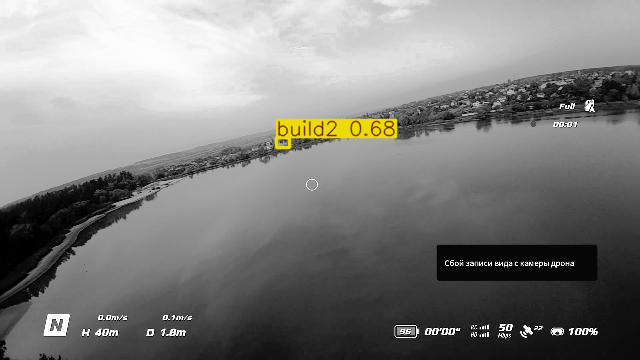

Detecciones para 013_png.rf.56567021e19a21947dbaf287f1685244.jpg:
Número de objetos detectados: 1
  Clase: build2, Confianza: 0.68



image 1/1 /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images/014_png.rf.faee8c1471e6435fd9afcb663244ff9e.jpg: 384x640 1 build, 1 build2, 10.4ms
Speed: 2.9ms preprocess, 10.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


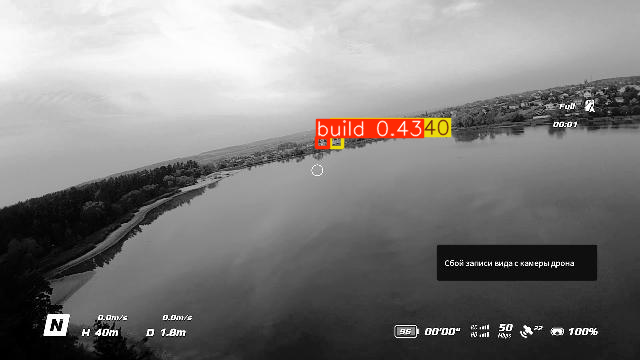

Detecciones para 014_png.rf.faee8c1471e6435fd9afcb663244ff9e.jpg:
Número de objetos detectados: 2
  Clase: build, Confianza: 0.43
  Clase: build2, Confianza: 0.40



image 1/1 /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images/021_png.rf.28f01b04601e9465b1d2a6c032294258.jpg: 384x640 (no detections), 10.6ms
Speed: 1.3ms preprocess, 10.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


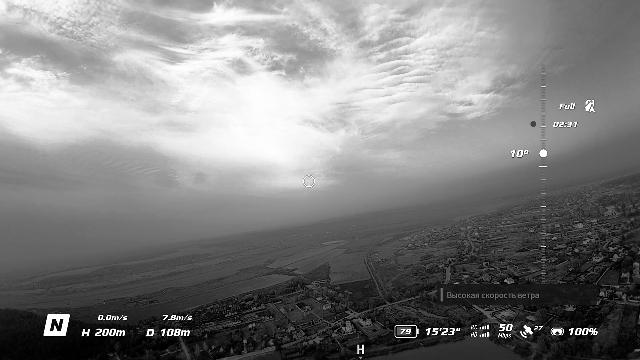

Detecciones para 021_png.rf.28f01b04601e9465b1d2a6c032294258.jpg:
Número de objetos detectados: 0



image 1/1 /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images/23_png.rf.f699489deb92e36be2a45b0651a8bc81.jpg: 384x640 1 build, 1 build2, 10.2ms
Speed: 1.6ms preprocess, 10.2ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)


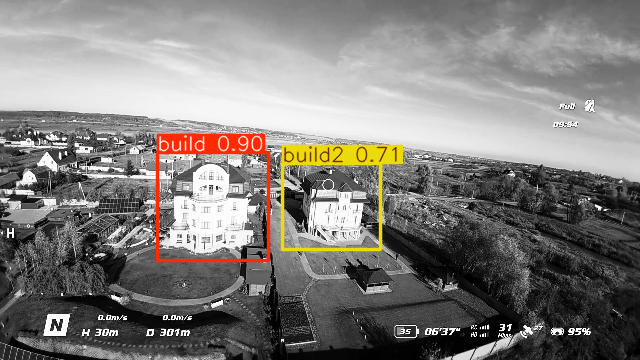

Detecciones para 23_png.rf.f699489deb92e36be2a45b0651a8bc81.jpg:
Número de objetos detectados: 2
  Clase: build, Confianza: 0.90
  Clase: build2, Confianza: 0.71



image 1/1 /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images/25_png.rf.11cd70935a39837f7f839ddf70b393c5.jpg: 384x640 2 build2s, 17.6ms
Speed: 1.5ms preprocess, 17.6ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


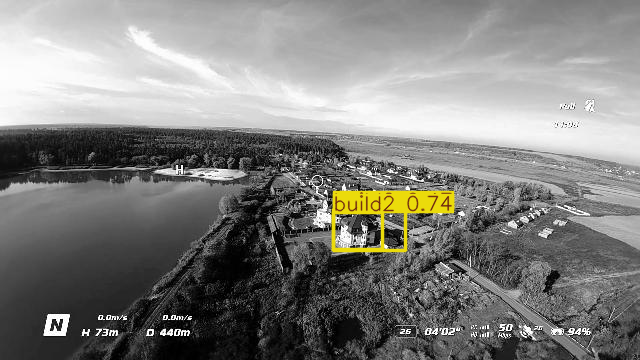

Detecciones para 25_png.rf.11cd70935a39837f7f839ddf70b393c5.jpg:
Número de objetos detectados: 2
  Clase: build2, Confianza: 0.74
  Clase: build2, Confianza: 0.47



image 1/1 /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images/9_png.rf.29fd11c24b38c6ccb4a40de001de75b1.jpg: 384x640 2 builds, 1 build2, 19.2ms
Speed: 1.5ms preprocess, 19.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)


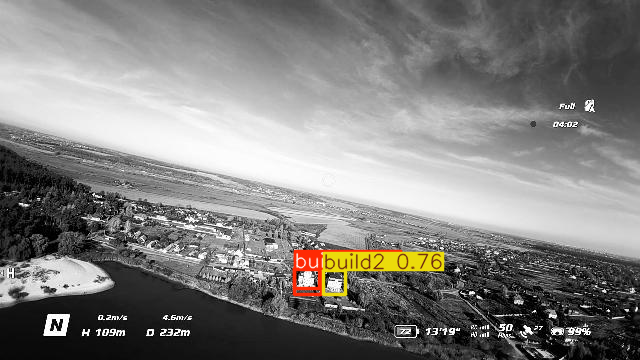

Detecciones para 9_png.rf.29fd11c24b38c6ccb4a40de001de75b1.jpg:
Número de objetos detectados: 3
  Clase: build2, Confianza: 0.76
  Clase: build, Confianza: 0.68
  Clase: build, Confianza: 0.63



image 1/1 /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images/build_1_02_png.rf.671f5f4b78fe5d065bfeb7f0365e95cc.jpg: 544x640 1 build, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 7.7ms postprocess per image at shape (1, 3, 544, 640)


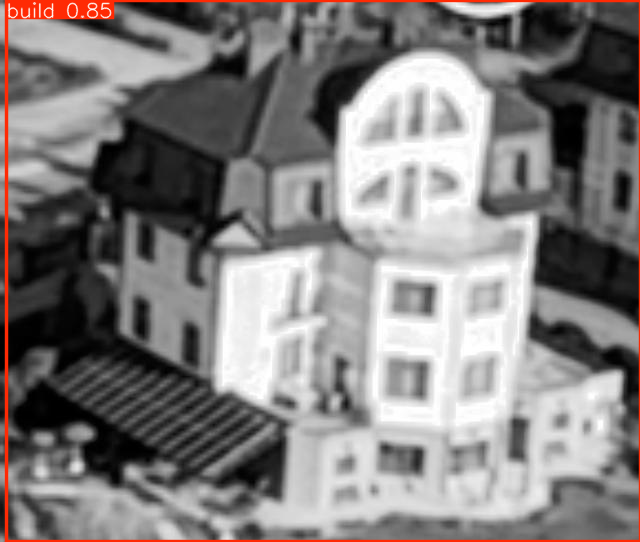

Detecciones para build_1_02_png.rf.671f5f4b78fe5d065bfeb7f0365e95cc.jpg:
Número de objetos detectados: 1
  Clase: build, Confianza: 0.85



image 1/1 /content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images/build_2_05_png.rf.8648184583def533c0dcd00d493f8b65.jpg: 544x640 1 build2, 13.1ms
Speed: 1.8ms preprocess, 13.1ms inference, 4.4ms postprocess per image at shape (1, 3, 544, 640)


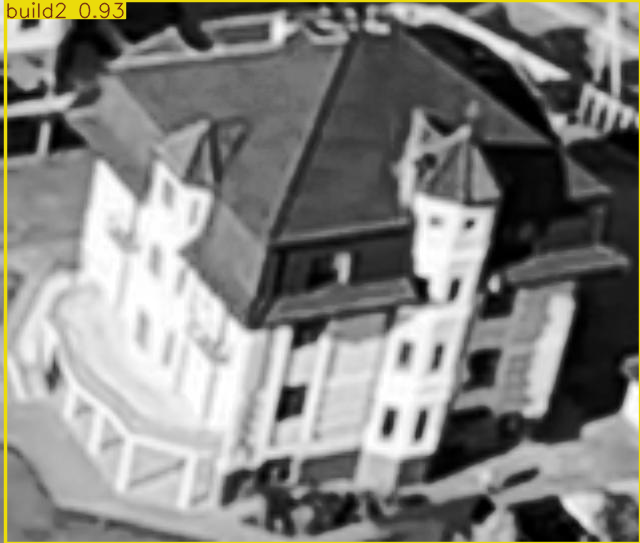

Detecciones para build_2_05_png.rf.8648184583def533c0dcd00d493f8b65.jpg:
Número de objetos detectados: 1
  Clase: build2, Confianza: 0.93


Resultados guardados en validation_results


In [11]:
from ultralytics import YOLO
import glob
import cv2
import os
from google.colab.patches import cv2_imshow
from IPython.display import display, Image
import numpy as np

# Cargar el modelo entrenado
model = YOLO('/content/drive/MyDrive/DroneYoloBuildsV8/runs/detect/yolov8n_custom_transfer/weights/best.pt')  # Ajusta esta ruta a donde se guardó tu mejor modelo

# Directorio que contiene las imágenes para validar
image_dir = '/content/drive/MyDrive/DroneYoloBuildsV8/BuildDetect-5/valid/images'  # Ajusta esta ruta a tu directorio de imágenes

# Obtener todas las imágenes en el directorio
image_files = glob.glob(os.path.join(image_dir, '*.jpg')) + glob.glob(os.path.join(image_dir, '*.png'))

# Crear un directorio para guardar los resultados
results_dir = 'validation_results'
os.makedirs(results_dir, exist_ok=True)

# Procesar cada imagen
for img_path in image_files:
    # Realizar la predicción
    results = model(img_path)

    # Obtener la imagen con las detecciones dibujadas
    img = results[0].plot()

    # Convertir de BGR a RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Guardar la imagen con las detecciones
    output_path = os.path.join(results_dir, os.path.basename(img_path))
    cv2.imwrite(output_path, cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR))

    # Mostrar la imagen usando cv2_imshow
    cv2_imshow(img_rgb)

    # Mostrar información sobre las detecciones
    print(f"Detecciones para {os.path.basename(img_path)}:")
    for r in results:
        print(f"Número de objetos detectados: {len(r.boxes)}")
        for box in r.boxes:
            print(f"  Clase: {model.names[int(box.cls)]}, Confianza: {box.conf.item():.2f}")

    print("\n")  # Agregar una línea en blanco entre imágenes

print(f"Resultados guardados en {results_dir}")